In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from scipy import ndimage as ndi
import math
from skimage import (
    exposure, io, filters
)

In [2]:
data = io.imread("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_G2_Fully_cyclinB1_20minrelease_H3S10_1-03-01.czi #1.tif_registered.tif")
print("shape: {}".format(data.shape))
print("dtype: {}".format(data.dtype))
print("range: ({}, {})".format(data.min(), data.max()))

shape: (57, 740, 740, 4)
dtype: uint16
range: (0, 7699)


In [3]:
#Channel 3: f-ara-EdU (green),
data_edu = data[:,:,:,2]
#Channel 4 – DNA(Hoechst) (magenta)
data_hoechst = data[:,:,:,3]

The next line should fail! Explain why!

In [47]:
plt.imshow(data_edu)

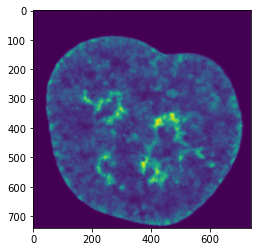

In [8]:
plt.imshow(data_edu[27,:,:])

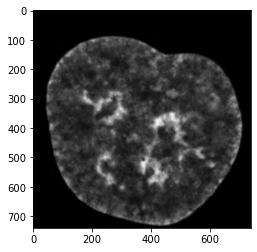

In [9]:
plt.imshow(data_edu[27,:,:],cmap="gray")

In [7]:
def display(im3d, cmap="gray", step=1, chosen = None, savefig = False):
    if chosen is None: 
        chosen = []
    stack_size = im3d.shape[0]
    cols = 5
    rows = math.ceil((stack_size/cols))
    
    h , axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3*cols, 3*rows)) 
    vmin = im3d.min()
    vmax = im3d.max()
    enum = 0
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        if enum in chosen:
            for axis in ['top','bottom','left','right']:
                #ax.spines[axis].set_linewidth(0.5)
                ax.spines[axis].set_color("red")
                ax.spines[axis].set_linewidth(5)
        ax.set_xticks([])
        ax.set_yticks([])
        enum += 1
    if savefig is True:
        plt.savefig('slice_gallery.png')

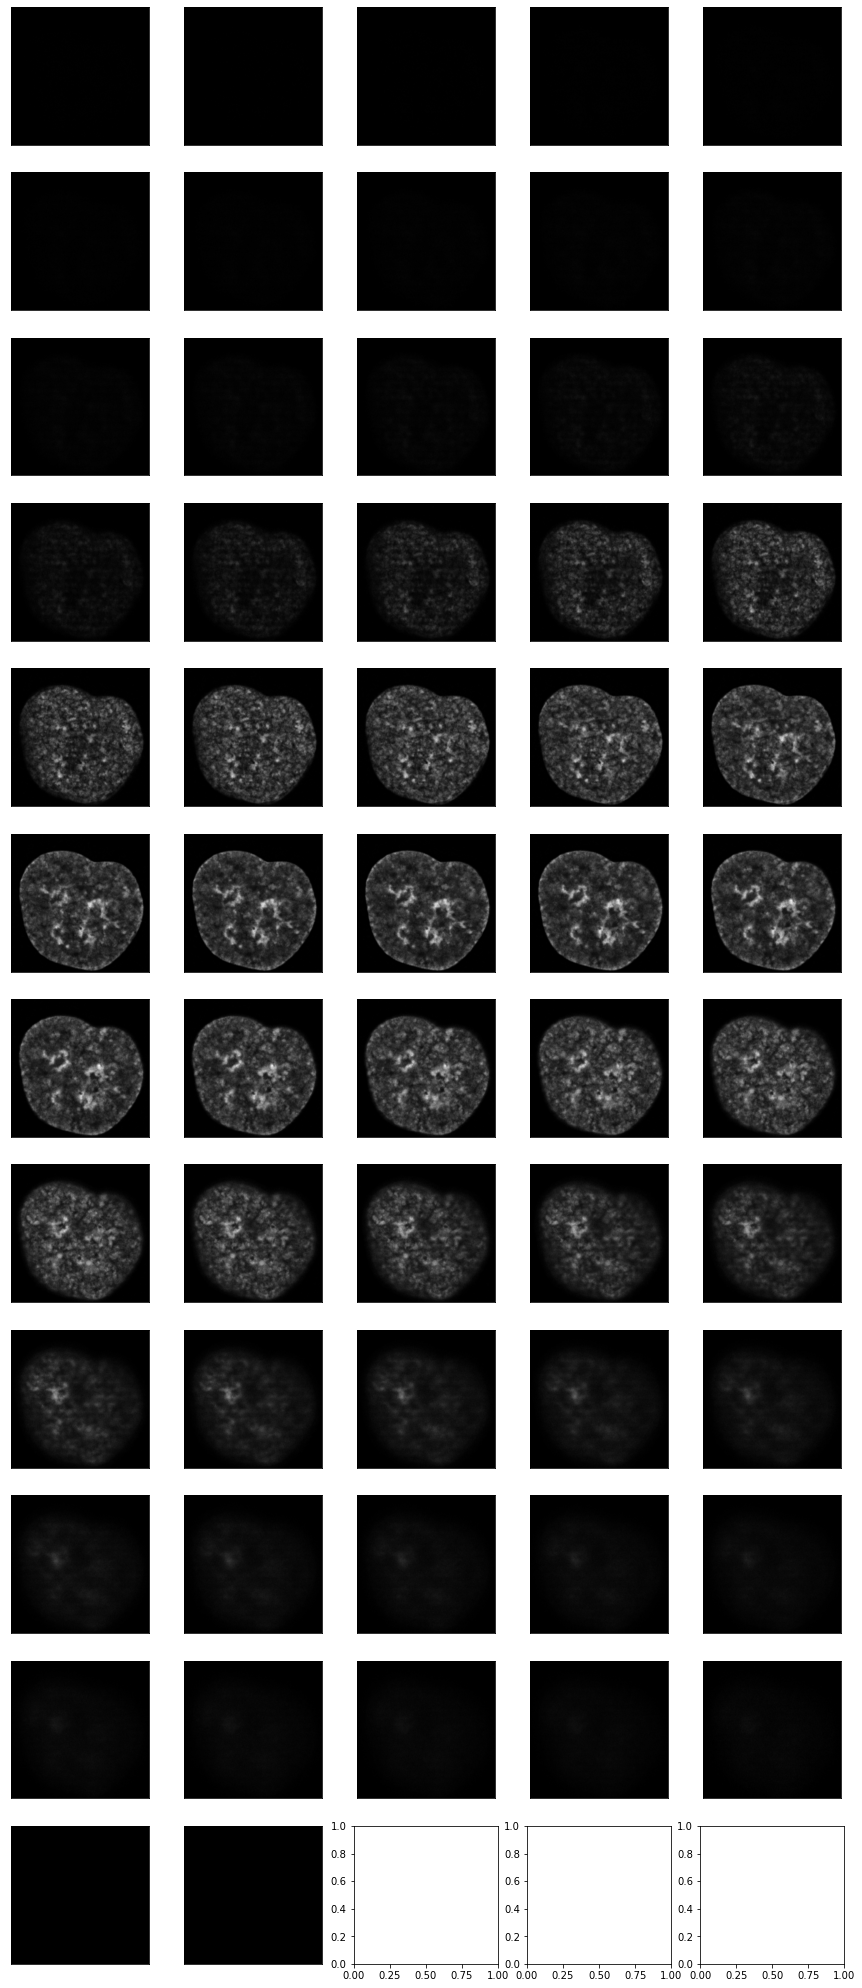

In [11]:
display(data_edu)

# HW Task 1:
Write a new display function:
- That has 4 columns with the corresponding hoechst and edu channels next to each other (hoechst1, edu1, hoechst2, edu2)
- Display one in red and one in green to make the channels more obvious
- Only display every 3rd image in the stack
- A second function that has 6 columns and displays the difference between the two channels in the 3rd and 6th column
- Use an appropriate color map
- Bonus: Works with an uneven number of images. 

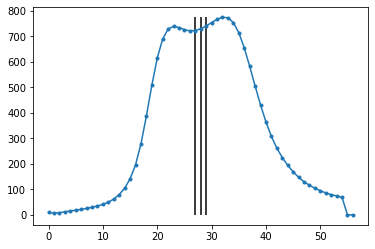

In [10]:
hist=[]
for i in range(57):
    hist.append(data_edu[i,:,:].mean())
plt.plot(range(57),hist,'.-')
#user selected slices
plt.vlines([27,28,29],0,max(hist))

In [4]:
data2 = io.imread("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_Hemi_cyclinB1_H3S10_1_20_min_release_nodrug-67.czi #5.tif_registered.tif")
data2_edu = data2[:,:,:,2]
print("shape: {}".format(data2.shape))
print("dtype: {}".format(data2.dtype))
print("range: ({}, {})".format(data2.min(), data2.max()))

shape: (83, 740, 740, 4)
dtype: uint16
range: (0, 7868)


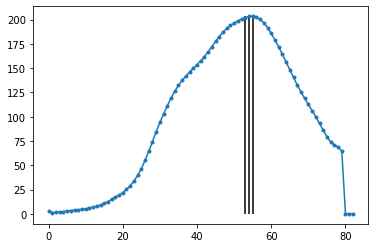

In [8]:
hist = []
for i in range(len(data2_edu)):
    hist.append(data2_edu[i,:,:].mean())
plt.plot(range(len(data2_edu)),hist,'.-')
#user selected slices
plt.vlines([53,54,55],0,max(hist))

## HW Task2:
- Imitate the user choice above. He wants the central 3 sections of a cell.
- Write a function that automatically chooses slices close to the selection above. (Do not hard code anything asume it should work on any new image.)
- Use the histogram above for the selection.
- Start with data2_edu, then try it for the data_edu

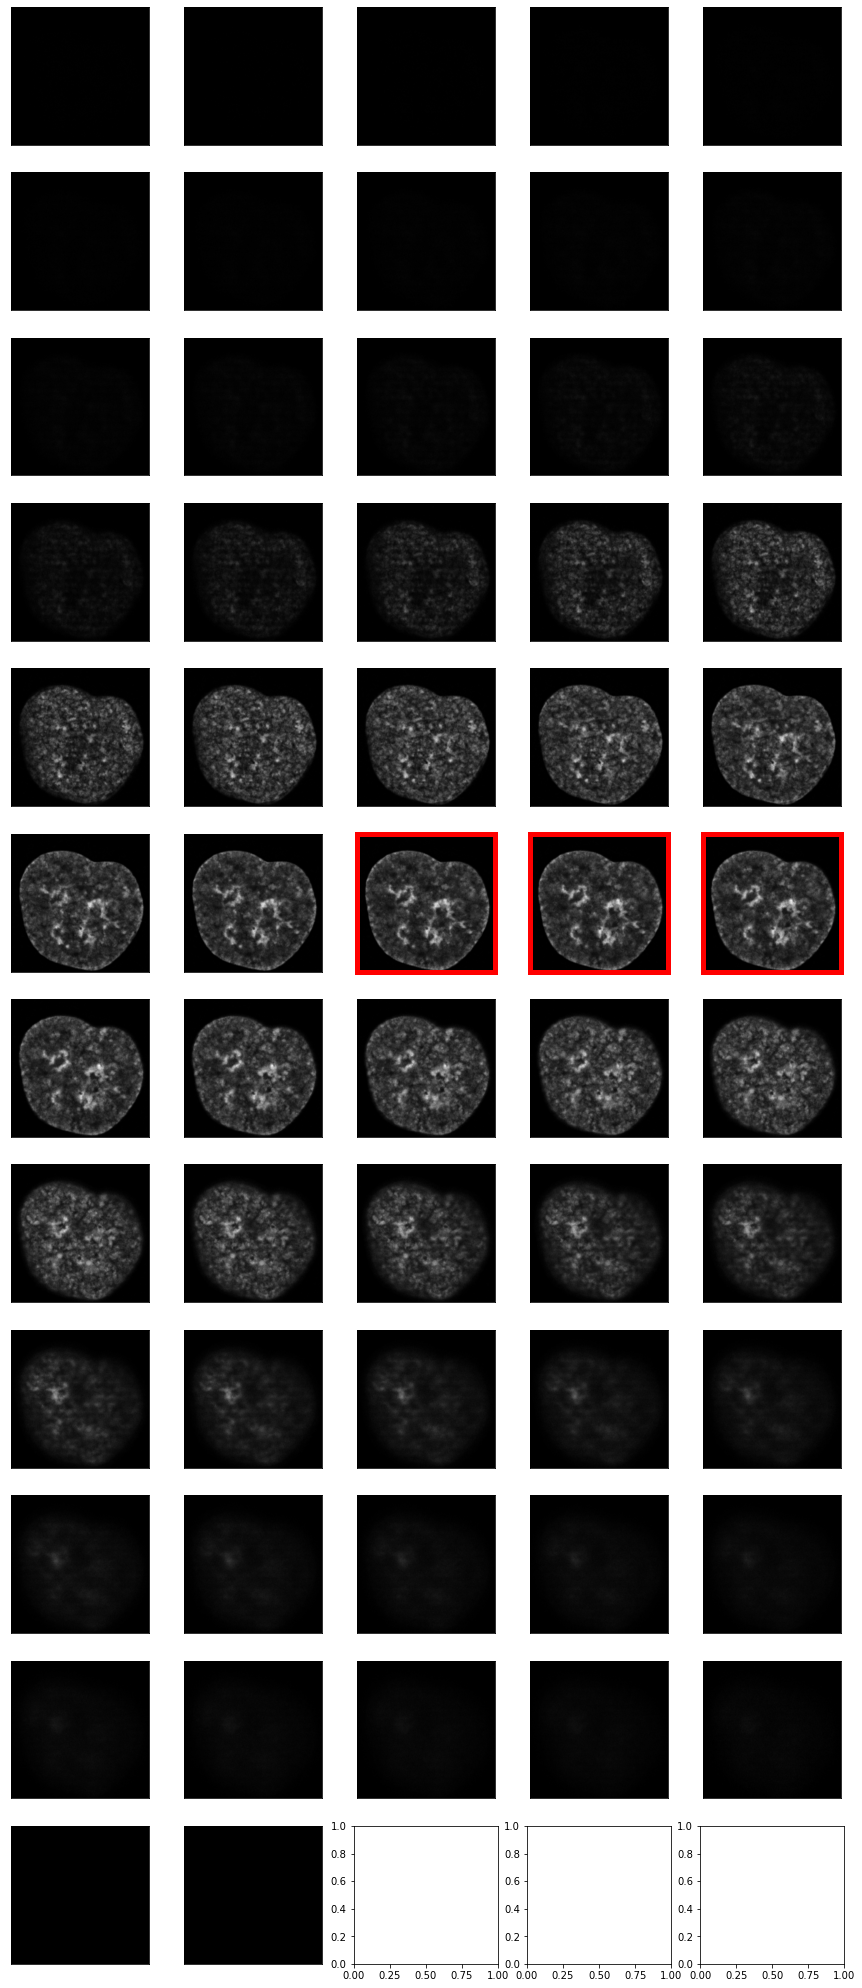

In [9]:
display(data_edu, chosen = [27,28,29])

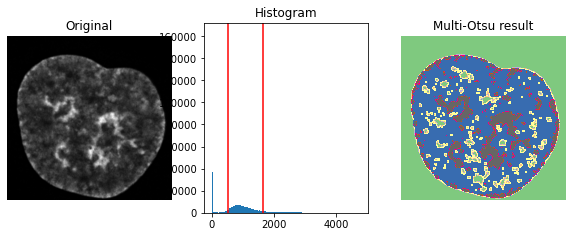

In [14]:
# The input image.
image = data_edu[27,:,:]

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [15]:
tresh = filters.threshold_li(image)
binary_mask = image > tresh

In [16]:
tresh

256.61331106504946

In [17]:
binary_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

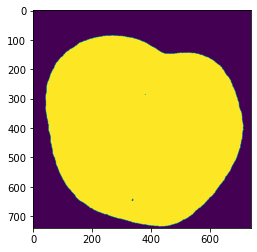

In [18]:
plt.imshow(binary_mask)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb81016cb10>,
       dtype=object))

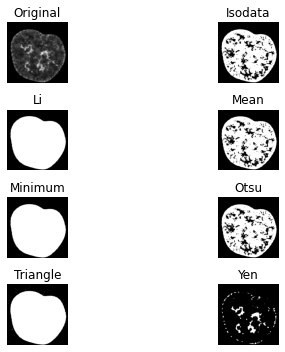

In [19]:
filters.try_all_threshold(image)

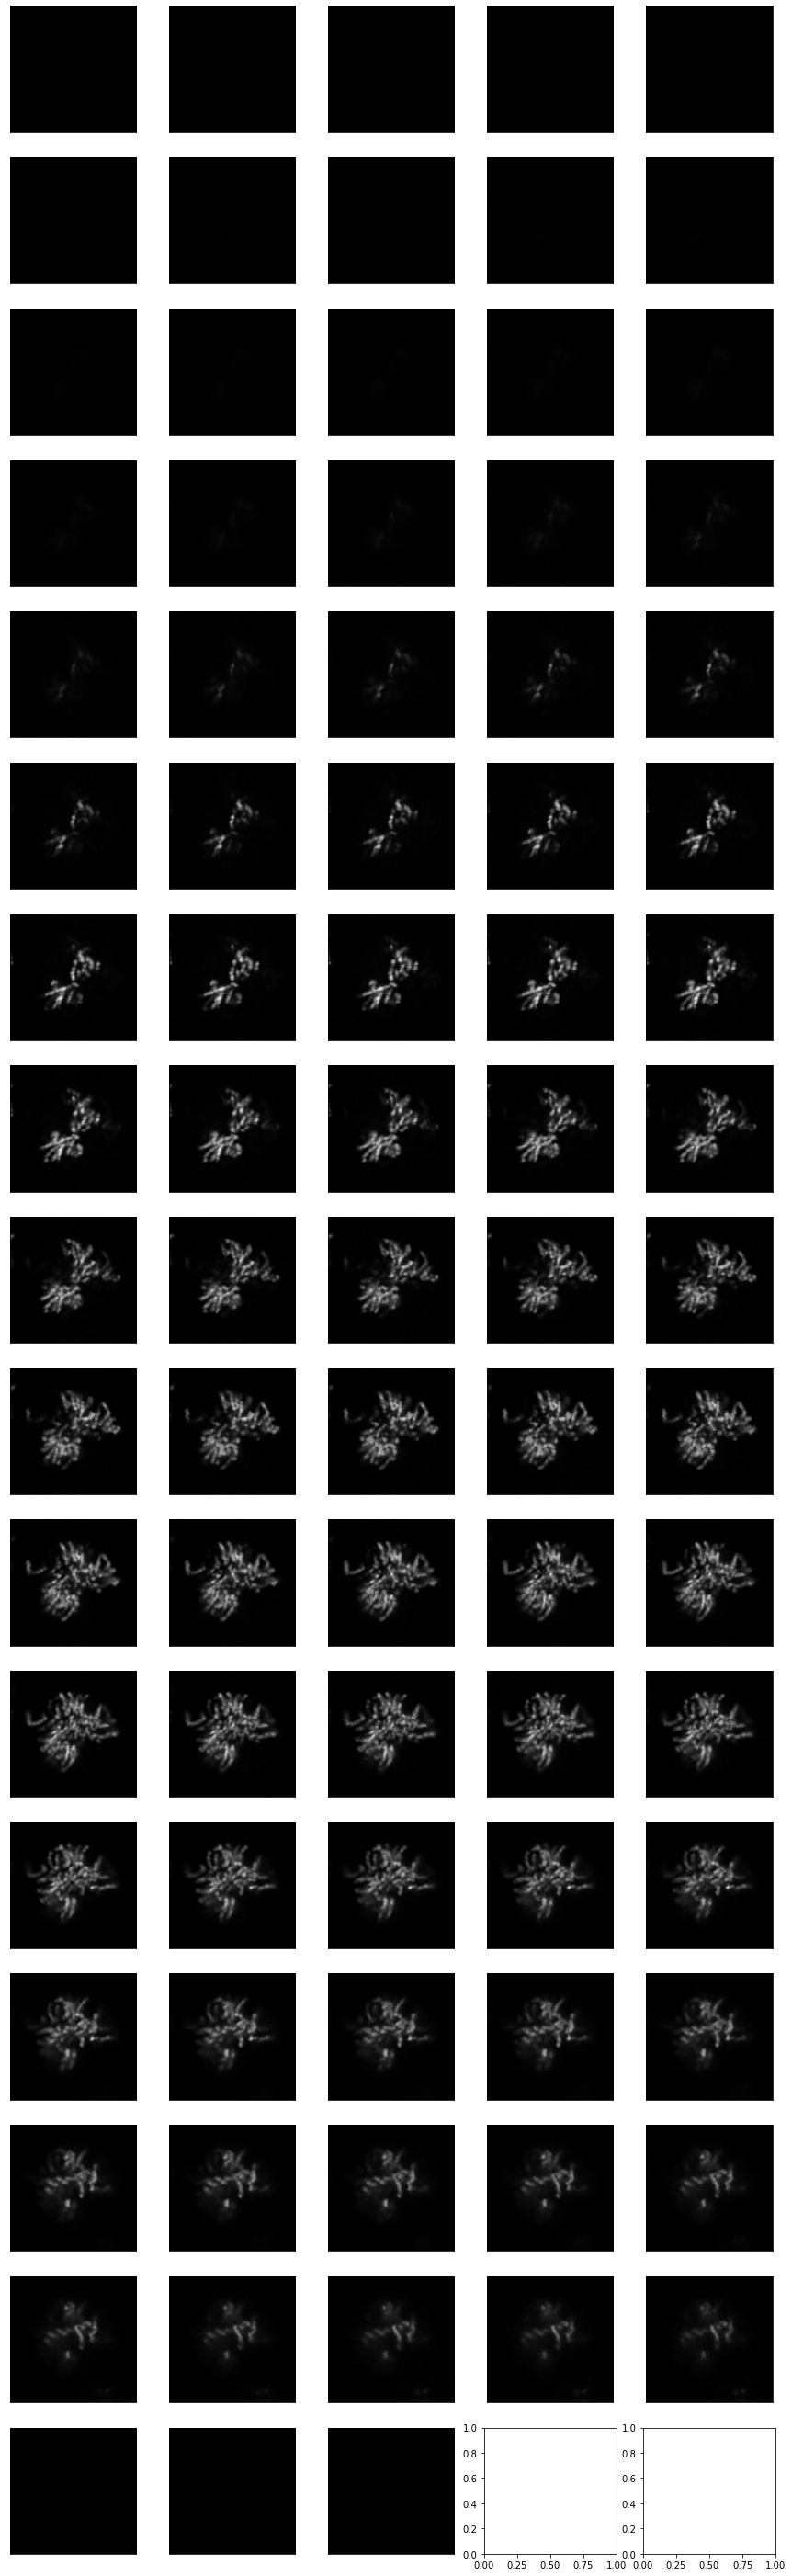

In [21]:
display(data2_edu)

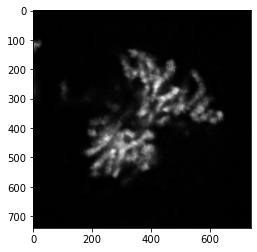

In [22]:
plt.imshow(data2_edu[42,:,:], cmap='gray')

In [23]:
image2 = data2_edu[42,:,:] 

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb80a7d8610>,
       dtype=object))

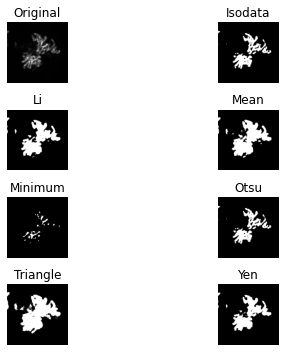

In [24]:
filters.try_all_threshold(image2)

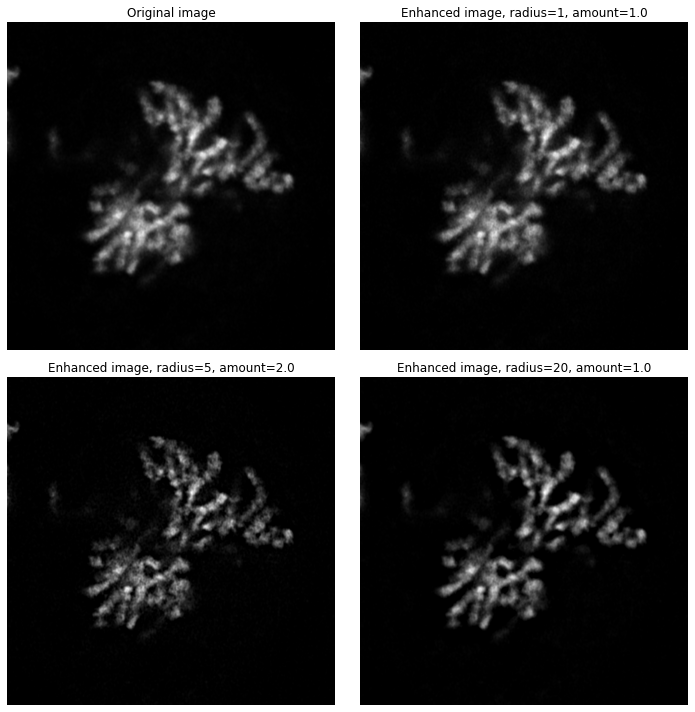

In [25]:
image = image2
result_1 = filters.unsharp_mask(image, radius=1, amount=1)
result_2 = filters.unsharp_mask(image, radius=5, amount=2)
result_3 = filters.unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

## Noise

## HW Task 3:
Show how the noise affects your segmentation:
- Try both images used so far.
- Try Different levels of noise.
- Try Denoising or blurring.
- Explain your method of choice



Example denoising methods:
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_restoration.html#sphx-glr-auto-examples-filters-plot-restoration-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html#sphx-glr-auto-examples-filters-plot-unsharp-mask-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html#sphx-glr-auto-examples-filters-plot-denoise-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_dog.html#sphx-glr-auto-examples-filters-plot-dog-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_j_invariant.html#sphx-glr-auto-examples-filters-plot-j-invariant-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_j_invariant.html#sphx-glr-auto-examples-filters-plot-j-invariant-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_j_invariant.html#sphx-glr-auto-examples-filters-plot-j-invariant-py



In [26]:
print("range: ({}, {})".format(data2.min(), data2.max()))

range: (0, 7868)


One way to generate noise:

In [36]:
noise_mask = np.full((740, 740), 28, dtype=np.uint16)
noise_mask[320:-320, 320:-320] = 300

noise = 0.1*((noise_mask * np.random.random(noise_mask.shape) - 0.2 *
         noise_mask).astype(np.uint16))

In [37]:
noise

array([[2.0000e+00, 1.6000e+00, 1.6000e+00, ..., 7.0000e-01, 6.5535e+03,
        1.4000e+00],
       [1.0000e+00, 1.3000e+00, 1.1000e+00, ..., 2.0000e+00, 2.0000e+00,
        0.0000e+00],
       [6.5535e+03, 9.0000e-01, 6.5532e+03, ..., 2.0000e+00, 4.0000e-01,
        3.0000e-01],
       ...,
       [2.0000e+00, 3.0000e-01, 1.8000e+00, ..., 1.6000e+00, 0.0000e+00,
        1.2000e+00],
       [1.3000e+00, 1.1000e+00, 1.2000e+00, ..., 1.6000e+00, 8.0000e-01,
        0.0000e+00],
       [2.0000e-01, 1.2000e+00, 0.0000e+00, ..., 3.0000e-01, 1.3000e+00,
        2.1000e+00]])

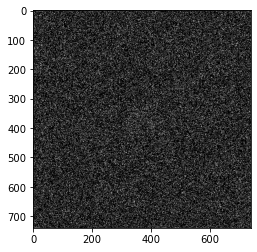

In [38]:
plt.imshow(noise, cmap='gray')

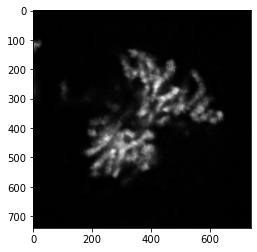

In [39]:
plt.imshow(image, cmap='gray')

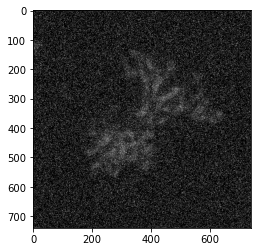

In [40]:
plt.imshow(image+noise, cmap='gray')

Another way to generate noise:

In [35]:
from skimage.util import random_noise

In [41]:
sigma = 0.02
noisy = random_noise(image, var=sigma**2)

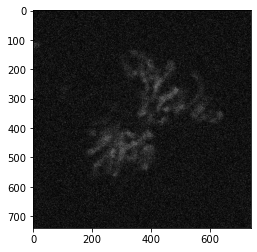

In [43]:
plt.imshow(noisy, cmap='gray')

## HW Task4:
Find an image of your experiments and:
- Segment it.
- Look at the effect of denoising
- Look at the effect of removing background
    - https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_regional_maxima.html#sphx-glr-auto-examples-color-exposure-plot-regional-maxima-py


## HW Task5:
Play with errosion and dilation to:
- fill holes in the mask
- create a halo around your images

Play with the expand_labels functionality.
- show how it differs
- explain it

Works only in skimage > 0.19.0.dev0:

In [46]:
from skimage import segmentation
plt.imshow(segmentation.expand_labels(binary_mask))

# Part3: Simple Object detection (Find extrema, enumerate roi's)
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_tophat.html#sphx-glr-auto-examples-filters-plot-tophat-py
- https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_extrema.html#sphx-glr-auto-examples-segmentation-plot-extrema-py
- https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html#sphx-glr-auto-examples-segmentation-plot-peak-local-max-py

# Part4: Image Registration:
- https://scikit-image.org/docs/stable/auto_examples/registration/plot_register_translation.html#sphx-glr-auto-examples-registration-plot-register-translation-py